In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# update matplotlib params for bigger font
import matplotlib.pylab as pylab
params = {'mathtext.fontset': 'stix',
         'font.family': 'STIXGeneral'}
pylab.rcParams.update(params)

In [3]:
from simple.simple import LognormalIntensityMock

In [4]:
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import astropy.constants as const

import numpy as np
import os

from scipy.integrate import quad

# Define the luminosity function

In [5]:
luminosity_unit = 1e42 * u.erg / u.s

def luminosity_function(L):
    """
    Calculates dn/dL (L), where L must be in units of luminosity_unit.
    For integration purposes, make sure that L/luminosity_unit is typically
    a small number, so that the numbers don't overflow in the integration.
    For example, luminosity_unit could be the mean expected luminosity.
    """
    Lstar = (4.87 * luminosity_unit).to(luminosity_unit).value # 1e42 erg / s
    phistar = 3.37 * 1e-4 # Mpc-3
    alpha = -1.8

    return phistar * (L/Lstar)**alpha * np.exp(-L/Lstar) * 1/Lstar


# Set up input parameters in a dictionary

In [65]:
input_dict = {"verbose" : False,
              "bias" : 1.5,
              "redshift" : 2.0,
              "single_redshift" : False,
              "box_size" : np.array([400,400,400]) * u.Mpc,
              "N_mesh" : np.array([128,128,128]),
              "luminosity_unit" : luminosity_unit,
              "Lmin" : 2e41 * u.erg/u.s,
              "Lmax" : np.inf * u.erg/u.s,
              "galaxy_selection" : {"intensity" : "all",
                                    "n_gal" : "detected"},
              "lambda_restframe" : 1215.67 * u.angstrom,
              "brightness_temperature" : False,
              "do_spectral_smooth" : True,
              "do_spectral_tophat_smooth" : False,
              "do_angular_smooth" : True,
              "sigma_beam" : 6 * u.arcsec,
              "dlambda" : 5 * u.angstrom,
              "footprint_radius" : 9 * u.arcmin,
              "luminosity_function" : luminosity_function,
              "run_pk" : {"intensity": True,
                        "n_gal": True,
                        "cross": True,
                        "sky_subtracted_cross": True
                            },
              "dk" : 0.04,
              "kmin" : 0.04,
              "kmax" : 1.0,
              "seed_lognormal" : 100,
              "outfile_prefix" : 'mock',
              "cosmology" : cosmo,
              "RSD" : True,
              "out_dir" : "../tmp/mocks/",
              "min_flux" : 3e-17 * u.erg/u.s/u.cm**2,
              "sigma_noise" : 2e-22 * u.erg/u.s/u.cm**2/u.angstrom/u.arcsec**2,
}

Initiate the LognormalIntensityMock instance with the input dictionary

In [66]:
lim = LognormalIntensityMock(input_dict)

Run the lognormal galaxy simulation from lognognormal_galaxies and load the catalog:

In [67]:
lim.run_lognormal_simulation_cpp()
lim.load_lognormal_catalog_cpp(
                bin_filename=lim.lognormal_bin_filename)

[0.   0.   0.06] eV
{'ofile_prefix': 'mock', 'inp_pk_fname': '../tmp/mocks/inputs/mock_pk.txt', 'xi_fname': '../tmp/mocks/inputs/mock_Rh_xi.txt', 'pkg_fname': '../tmp/mocks/inputs/mock_pkG.dat', 'mpkg_fname': '../tmp/mocks/inputs/mock_mpkG.dat', 'cpkg_fname': '../tmp/mocks/inputs/mock_mpkG.dat', 'f_fname': '../tmp/mocks/inputs/mock_fnu.txt', 'z': 2.0, 'mnu': 0.06, 'oc0h2': 0.11934063901639999, 'ob0h2': 0.0224178568132, 'ns': 0.9645, 'lnAs': 3.094, 'h0': <Quantity 0.6766>, 'w': -1.0, 'run': 0.0, 'bias': 1.5, 'bias_mpkG': 1.0, 'bias_cpkG': 1.35, 'Nrealization': 1, 'Ngalaxies': 279657, 'Lx': 270.64000000000004, 'Ly': 270.64000000000004, 'Lz': 270.64000000000004, 'rmax': 10000.0, 'seed': 100, 'Pnmax': 128, 'losy': 0.0, 'losz': 0.0, 'kbin': 0.01, 'kmax': 0.0, 'lmax': 4, 'gen_inputs': True, 'run_lognormal': True, 'calc_pk': False, 'calc_cpk': False, 'use_cpkG': 0, 'output_matter': 0, 'output_gal': 1, 'calc_mode_pk': 0, 'out_dir': '../tmp/mocks/', 'halofname_prefix': '', 'imul_fname': '', 'nu

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG

real	0m0.016s
user	0m0.005s
sys	0m0.006s

real	0m0.034s
user	0m0.027s
sys	0m0.004s

real	0m0.023s
user	0m0.015s
sys	0m0.005s

real	0m0.022s
user	0m0.016s
sys	0m0.004s


Finished generating mock density field.
Doing FFT for density field.
Done FFT for density field.
Average of Log-normal density field  :-3.05271e-09
Variance of Log-normal density field :1568.33
Average of Log-normal density field  :-1.45565e-15
Variance of Log-normal density field :1.08298
Average of matter Log-normal density field :-4.62067e-10
Variance of matter Log-normal density field :1197.7
Average of matter Log-normal density field :-2.20331e-16
Variance of matter Log-normal density field :0.82705
density maximum = 153.52
density minimum = -0.997805
Average of density field: 0.00100348
Variance of density field: 2.26557
Doing FFT for the density field.
Calculating velocity field in Fourier space...
Doing FFT for the vx field.
Doing FFT for the vy field.
Doing FFT for the vz field.
Initializing random generater..
checkpoint 1
Ngalaxies 279657
checkpoint 2
checkpoint 3
checkpoint 4
final_array_length 3355884
checkpoint 5: allocated array.
Generating Poisson particles...........
ng


real	0m0.215s
user	0m0.245s
sys	0m0.025s


Assign the redshift along the LOS axis (0):

If you want to assign a single redshift to the entire box, run
`lim.assign_single_redshift()`

In [68]:
lim.assign_redshift_along_axis()

Assign a luminosity to each galaxy following the luminosity function,
convert the luminosity to the flux, and see which galaxies are detected.

In [69]:
lim.assign_luminosity()
lim.assign_flux()
lim.apply_selection_function()

Check if the luminosity function is reproduced:

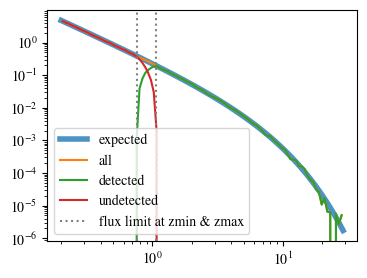

In [70]:
plt.figure(figsize=(4,3))
Ls = np.logspace(np.log10(lim.Lmin.to(luminosity_unit).value),
                 np.log10(np.nanmin([lim.Lmax.to(luminosity_unit).value, 1e6 * lim.Lmin.to(luminosity_unit).value])), 100)
n_bar_gal = quad(lim.luminosity_function, lim.Lmin.to(luminosity_unit).value, lim.Lmax.to(luminosity_unit).value)[0]
plt.plot(Ls, lim.luminosity_function(Ls) / n_bar_gal, label='expected', linewidth=4, alpha=0.8)
hist, bin_edges = np.histogram(lim.cat['luminosity'].to(luminosity_unit).value, bins=Ls, density=True)
hist_det, bin_edges = np.histogram(lim.cat['luminosity'][lim.cat['detected']].to(luminosity_unit).value, bins=Ls, density=True)
hist_undet, bin_edges = np.histogram(lim.cat['luminosity'][~lim.cat['detected']].to(luminosity_unit).value, bins=Ls, density=True)
plt.plot((Ls[:-1] + 0.5 * np.diff(Ls)), hist, label='all')
plt.plot(Ls[:-1] + 0.5 * np.diff(Ls), hist_det * (lim.N_gal_detected / lim.N_gal), label='detected')
plt.plot(Ls[:-1] + 0.5 * np.diff(Ls), hist_undet * (1-lim.N_gal_detected / lim.N_gal), label='undetected')

plt.axvline((lim.min_flux*(4*np.pi*lim.astropy_cosmo.luminosity_distance(lim.redshift+lim.delta_redshift)**2)).to(luminosity_unit).value,
              linestyle=':', color='gray')
plt.axvline((lim.min_flux*(4*np.pi*lim.astropy_cosmo.luminosity_distance(lim.redshift-lim.delta_redshift)**2)).to(luminosity_unit).value,
            linestyle=':', color='gray', label='flux limit at zmin & zmax')
plt.yscale("log")
plt.xscale("log")
plt.legend()

 make sure that the selection function is working

In [71]:
print("input min_flux: {:e}\nmin flux of the detected galaxies: {:e}".format(lim.min_flux, np.min(lim.cat['flux'][lim.cat['detected']])))
print("Any galaxies that are below the detection limit? {}.".format(np.min(lim.cat['flux'][lim.cat['detected']]) < lim.min_flux))

input min_flux: 3.000000e-17 erg / (cm2 s)
min flux of the detected galaxies: 3.000023e-17 erg / (cm2 s)
Any galaxies that are below the detection limit? False.


Paint the intensity mesh using the redshift-space positions.

If you want to work in real space, exchange `RSD_Position` with `Position`.

In [72]:
intensity_mesh = lim.paint_intensity_mesh(position="RSD_Position")

Mesh assignment: finished 1/279646.
Mesh assignment: finished 100001/279646.
Mesh assignment: finished 200001/279646.
2023-07-07 10:22:53,094 simple WARNING: The smoothing length along or perpendicular to the LOS is smaller than the voxel size! You should consider using a larger smoothing length.


Plot the average intensity along the 3 different axes to visualize the smoothing:

Text(0, 0.5, 'LOS distance [Mpc/h]')

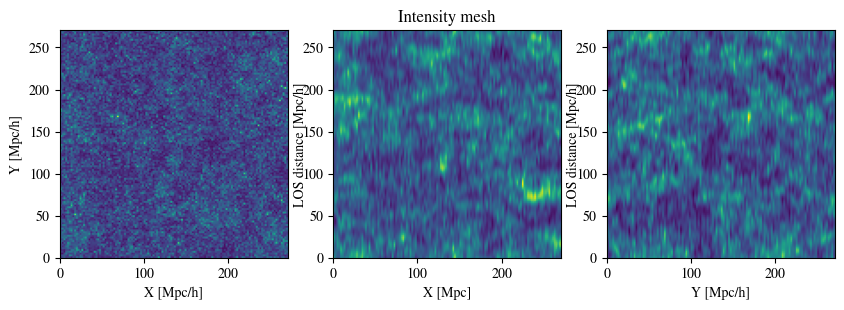

In [73]:
fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(131)
ax1.imshow(np.mean(lim.intensity_mesh.value, axis=0), 
           extent=[0,lim.box_size[1].value, 0, lim.box_size[2].value],
           origin='lower')
ax1.set_xlabel("X [Mpc/h]")
ax1.set_ylabel("Y [Mpc/h]")

ax2 = fig.add_subplot(132)
ax2.imshow(np.mean(lim.intensity_mesh.value, axis=1), 
           extent=[0,lim.box_size[1].value, 0, lim.box_size[2].value],
           origin='lower')
ax2.set_xlabel("X [Mpc]")
ax2.set_ylabel("LOS distance [Mpc/h]", labelpad=-3)
ax2.set_title("Intensity mesh")

ax3 = fig.add_subplot(133)
ax3.imshow(np.mean(lim.intensity_mesh.value, axis=2), 
           extent=[0,lim.box_size[1].value, 0, lim.box_size[2].value],
           origin='lower')
ax3.set_xlabel("Y [Mpc/h]")
ax3.set_ylabel("LOS distance [Mpc/h]", labelpad=-3)


Get the intensity noise cube

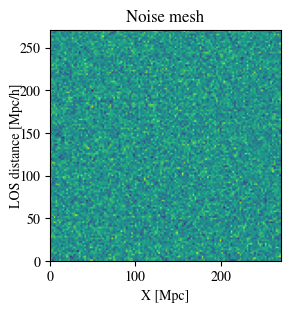

In [74]:
lim.get_intensity_noise_cube()
plt.figure(figsize=(3,3))
plt.imshow(np.mean(lim.noise_mesh.value, axis=1), 
           extent=[0,lim.box_size[1].value, 0, lim.box_size[2].value],
           origin='lower')
plt.xlabel("X [Mpc]")
plt.ylabel("LOS distance [Mpc/h]", labelpad=-3)
plt.title("Noise mesh");

You can also generate the galaxy number density mesh:

Mesh assignment: finished 1/55897.


Text(0, 0.5, 'LOS distance [Mpc/h]')

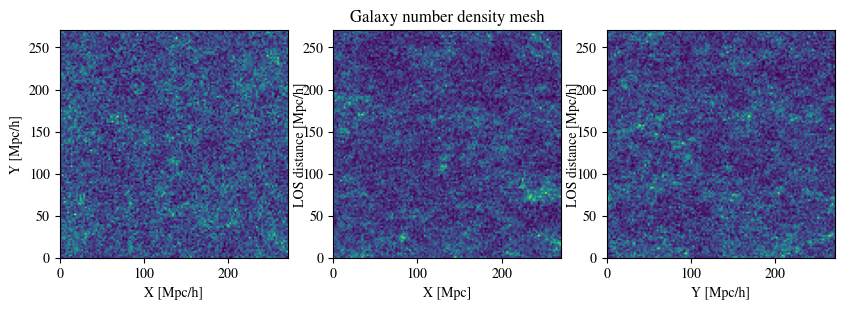

In [75]:
lim.paint_galaxy_mesh(position="RSD_Position")

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(131)
ax1.imshow(np.mean(lim.n_gal_mesh.value, axis=0), 
           extent=[0,lim.box_size[1].value, 0, lim.box_size[2].value],
           origin='lower')
ax1.set_xlabel("X [Mpc/h]")
ax1.set_ylabel("Y [Mpc/h]")

ax2 = fig.add_subplot(132)
ax2.imshow(np.mean(lim.n_gal_mesh.value, axis=1), 
           extent=[0,lim.box_size[1].value, 0, lim.box_size[2].value],
           origin='lower')
ax2.set_xlabel("X [Mpc]")
ax2.set_ylabel("LOS distance [Mpc/h]", labelpad=-3)
ax2.set_title("Galaxy number density mesh")

ax3 = fig.add_subplot(133)
ax3.imshow(np.mean(lim.n_gal_mesh.value, axis=2), 
           extent=[0,lim.box_size[1].value, 0, lim.box_size[2].value],
           origin='lower')
ax3.set_xlabel("Y [Mpc/h]")
ax3.set_ylabel("LOS distance [Mpc/h]", labelpad=-3)


Save the LognormalIntensityMock instance and catalog to files:

In [76]:
filename = os.path.join(
                lim.out_dir,
                "lognormal",
                "rsd",
                lim.outfile_prefix + "_lim_instance.h5",
            )
catalog_filename = os.path.join(
    lim.out_dir, "lognormal", lim.outfile_prefix + "_lognormal_rlz0.h5"
)
lim.save_to_file(filename=filename,
                              catalog_filename=catalog_filename)

2023-07-07 10:22:55,002 simple ERROR: Error with dict input_dict: Object dtype dtype('O') has no native HDF5 equivalent


You can initiate a LognormalIntensityMock instance from a file:

In [77]:
lim = LognormalIntensityMock.from_file(filename = filename, catalog_filename = catalog_filename)

2023-07-07 10:22:55,103 simple INFO: Initializing LognormalIntensityMock instance.
2023-07-07 10:22:55,104 simple WARNING: We extrapolate the values outside of the provided tabulated values of L.
Plot plt.loglog(Ls, lim.luminosity_function(Ls)) in a reasonable range to check the outcome!
2023-07-07 10:22:55,105 simple INFO: luminosity_unit: 1e+42 erg / s
2023-07-07 10:22:55,105 simple INFO: Using input power spectrum.
2023-07-07 10:22:55,105 simple INFO: Using input logarithmic growth rate.
2023-07-07 10:22:55,106 simple INFO: limit_ngal: None
2023-07-07 10:22:55,106 simple INFO: Done
2023-07-07 10:22:55,107 simple INFO: Initializing intensity_mesh.
2023-07-07 10:22:55,110 simple INFO: intensity_mesh.unit: 3.11331e+41 erg m / (Angstrom km Mpc2 s sr)
2023-07-07 10:22:55,110 simple INFO: Initializing noise_mesh.
2023-07-07 10:22:55,119 simple INFO: Initializing n_gal_mesh.
2023-07-07 10:22:55,122 simple INFO: Initializing catalog from file ../tmp/mocks/lognormal/mock_lognormal_rlz0.h5.
2

Calculate and plot the power spectrum multipoles:

THe units $u_A$ are $u_\mathrm{g} = 1$ and $u_I = \langle I \rangle$.

In [78]:
monopoles = {}
mean_ks = {}
quadrupoles = {}

for tracer in ["intensity", "n_gal", "cross", "sky_subtracted_intensity", "sky_subtracted_cross"]:
    mean_ks[tracer], monopoles[tracer], quadrupoles[tracer] = lim.Pk_multipoles(tracer=tracer, save=True)

2023-07-07 10:22:55,204 simple INFO: Getting power spectrum multipoles of intensity.
2023-07-07 10:22:55,205 simple INFO: Calculating mean intensity.
2023-07-07 10:22:55,420 simple INFO: Getting mean intensity of all galaxies.
2023-07-07 10:22:55,427 simple INFO: Integration result and uncertainty (should be much smaller than result!): (0.0032294261054112757, 6.259931809308527e-12)
2023-07-07 10:22:55,451 simple INFO: Prepared intensity map.
2023-07-07 10:22:55,452 simple INFO: kmin, kmax, dk = 0.04 1.0 0.04
2023-07-07 10:22:55,452 simple INFO: Prepared k values.
2023-07-07 10:22:55,453 simple INFO: Calculated delta k squared.
2023-07-07 10:22:55,454 simple INFO: Getting k_spec...
2023-07-07 10:22:55,459 simple INFO: Done with the biggest part including k_par and k_perp.
2023-07-07 10:22:55,459 simple INFO: Done
2023-07-07 10:22:55,492 simple INFO: Calculating summary statistics.
2023-07-07 10:22:55,515 simple INFO: Calculated monopole.
2023-07-07 10:22:55,544 simple INFO: Calculated q

/Users/maja/Documents/projects/intensity-mapping/simple/simple/tools_python.py:345: RuntimeWarning: invalid value encountered in true_divide
  return np.where(x != 0, j1(x) / x, 0.5)


2023-07-07 10:22:56,039 simple INFO: Calculated monopole.
2023-07-07 10:22:56,064 simple INFO: Calculated quadrupole.
2023-07-07 10:22:56,083 simple INFO: Calculated mean_k.
2023-07-07 10:22:56,084 simple INFO: Finished binning delta k squared.
2023-07-07 10:22:56,085 simple INFO: Overwriting sky_subtracted_cross in file ../tmp/mocks/pk/rsd/mock_pk.h5.
2023-07-07 10:22:56,089 simple INFO: Saved to ../tmp/mocks/pk/rsd/mock_pk.h5


Text(0, 0.5, '$k^2 P_2^{AB}$ [Mpc$^3$ $h^{-1}u_A u_B$]')

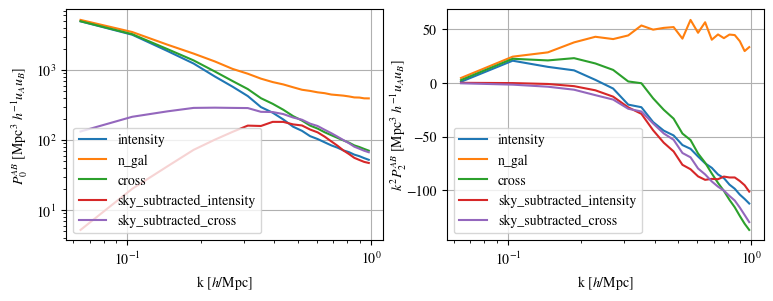

In [79]:
fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(121)
for tracer in ["intensity", "n_gal", "cross", "sky_subtracted_intensity", "sky_subtracted_cross"]:
    ax1.plot(mean_ks[tracer], monopoles[tracer], label=tracer)

ax2 = fig.add_subplot(122)
for tracer in ["intensity", "n_gal", "cross", "sky_subtracted_intensity", "sky_subtracted_cross"]:
    ax2.plot(mean_ks[tracer], mean_ks[tracer]**2 * quadrupoles[tracer], label=tracer)

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend()
ax1.grid()
ax1.set_xlabel(r"k [$h$/Mpc]")
ax1.set_ylabel(r"$P_0^{AB}$ [Mpc$^3$ $h^{-1}u_A u_B$]")

ax2.set_xscale("log")
ax2.legend()
ax2.grid()
ax2.set_xlabel(r"k [$h$/Mpc]")
ax2.set_ylabel(r"$k^2 P_2^{AB}$ [Mpc$^3$ $h^{-1}u_A u_B$]", labelpad=-2)

You can also do everything in one step if the input dictionary is complete:

In [80]:
lim.run()

2023-07-07 10:22:56,546 simple INFO: Running lognormal simulation using lognormal_galaxies.
2023-07-07 10:22:56,547 simple INFO: Getting mean galaxy number density.
2023-07-07 10:22:56,555 simple INFO: Integration result and uncertainty (should be much smaller than result!): (0.004369624909540288, 1.1087270513592894e-09)
2023-07-07 10:22:56,556 simple INFO: Done.
2023-07-07 10:22:56,556 simple INFO: Expecting 279657 galaxies in the simulation.
[0.   0.   0.06] eV
{'ofile_prefix': 'mock', 'inp_pk_fname': '../tmp/mocks/inputs/mock_pk.txt', 'xi_fname': '../tmp/mocks/inputs/mock_Rh_xi.txt', 'pkg_fname': '../tmp/mocks/inputs/mock_pkG.dat', 'mpkg_fname': '../tmp/mocks/inputs/mock_mpkG.dat', 'cpkg_fname': '../tmp/mocks/inputs/mock_mpkG.dat', 'f_fname': '../tmp/mocks/inputs/mock_fnu.txt', 'z': 2.0, 'mnu': 0.06, 'oc0h2': 0.11934063901639999, 'ob0h2': 0.0224178568132, 'ns': 0.9645, 'lnAs': 3.094, 'h0': <Quantity 0.6766>, 'w': -1.0, 'run': 0.0, 'bias': 1.5, 'bias_mpkG': 1.0, 'bias_cpkG': 1.35, 'N

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG

real	0m0.017s
user	0m0.005s
sys	0m0.005s

real	0m0.033s
user	0m0.027s
sys	0m0.004s

real	0m0.022s
user	0m0.015s
sys	0m0.004s

real	0m0.022s
user	0m0.016s
sys	0m0.004s


Finished generating mock density field.
Doing FFT for density field.
Done FFT for density field.
Average of Log-normal density field  :-1.74366e-09
Variance of Log-normal density field :1568.33
Average of Log-normal density field  :-8.31441e-16
Variance of Log-normal density field :1.08298
Average of matter Log-normal density field :7.25929e-11
Variance of matter Log-normal density field :1197.7
Average of matter Log-normal density field :3.4615e-17
Variance of matter Log-normal density field :0.82705
density maximum = 153.52
density minimum = -0.997805
Average of density field: 0.00100348
Variance of density field: 2.26557
Doing FFT for the density field.
Calculating velocity field in Fourier space...
Doing FFT for the vx field.
Doing FFT for the vy field.
Doing FFT for the vz field.
Initializing random generater..
checkpoint 1
Ngalaxies 279657
checkpoint 2
checkpoint 3
checkpoint 4
final_array_length 3355884
checkpoint 5: allocated array.
Generating Poisson particles...........
ngalb


real	0m0.199s
user	0m0.241s
sys	0m0.023s


Mesh assignment: finished 1/279646.
Mesh assignment: finished 100001/279646.
Mesh assignment: finished 200001/279646.
2023-07-07 10:22:58,327 simple INFO: Mean intensity before smoothing: 0.1333456188440323.
2023-07-07 10:22:58,328 simple INFO: Min intensity before smoothing: 0.0.
2023-07-07 10:22:58,328 simple INFO: Smoothing...
2023-07-07 10:22:58,339 simple INFO: Smoothing LOS: 4.088752318443998
2023-07-07 10:22:58,339 simple INFO: Smoothing angular: 0.10447309933818884
2023-07-07 10:22:58,340 simple WARNING: The smoothing length along or perpendicular to the LOS is smaller than the voxel size! You should consider using a larger smoothing length.
2023-07-07 10:22:58,342 simple INFO: Smoothing with a Gaussian along the LOS.
2023-07-07 10:22:58,375 simple INFO: Mean intensity after smoothing: 0.1333455890417099.
2023-07-07 10:22:58,377 simple INFO: Min intensity after smoothing: -0.004271429032087326.
2023-07-07 10:22:58,381 simple INFO: Fraction of voxels with I<0: 0.0443987846374511

For the power spectrum, we need to calculate the mean intensity per redshift and the mean galaxy number density per redshift.
We can check that it is working by calling `lim.mean_intensity_per_redshift(lim.redshift_mesh_axis, tracer='intensity')` or `lim.mean_intensity_per_redshift(lim.redshift_mesh_axis, tracer='n_gal')`

2023-07-07 10:22:59,208 simple INFO: Getting mean intensity of all galaxies.
2023-07-07 10:22:59,217 simple INFO: Integration result and uncertainty (should be much smaller than result!): (0.003228633649932538, 5.913442578205095e-09)
2023-07-07 10:22:59,230 simple INFO: Getting mean n_gal of detected galaxies.


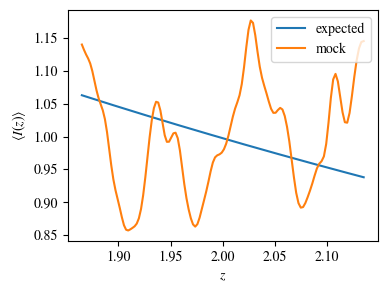

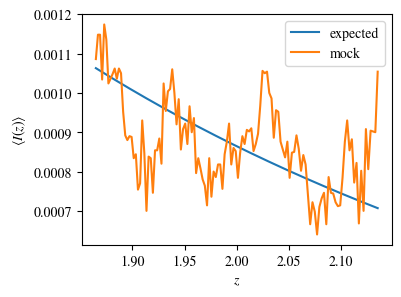

In [81]:
plt.figure(figsize=(4,3))
plt.plot(lim.redshift_mesh_axis, lim.mean_intensity_per_redshift_mesh.to(lim.mean_intensity)[:,0,0], label='expected')
plt.plot(lim.redshift_mesh_axis, np.mean(lim.intensity_mesh, axis=(1,2)).to(lim.mean_intensity), label='mock')
plt.xlabel(r"$z$")
plt.ylabel(r"$\langle I(z)\rangle$")
plt.legend()

plt.figure(figsize=(4,3))
plt.plot(lim.redshift_mesh_axis, lim.mean_ngal_per_redshift_mesh.to(u.Mpc**-3)[:,0,0], label='expected')
plt.plot(lim.redshift_mesh_axis, np.mean(lim.n_gal_mesh, axis=(1,2)).to(u.Mpc**-3), label='mock')
plt.xlabel(r"$z$")
plt.ylabel(r"$\langle I(z)\rangle$")
plt.legend()

# Plot the VID

In [82]:
if lim.brightness_temperature:
    intensity_unit = u.uK / u.sr
    intensity_unit_str = r'$\mu$K'
else:
    try:
        lim.dnu
        intensity_unit = u.erg/u.s/u.cm**2/u.arcsec**2/u.Hz
        intensity_unit_str = r'$\mathrm{erg\, s^{-1}\, cm^{-2}\, arcsec}^{-2}\, \AA^{-1}$'
    except:
        intensity_unit = u.erg/u.s/u.cm**2/u.arcsec**2/u.angstrom
        intensity_unit_str = r'$\mathrm{erg\, s^{-1}\, cm^{-2}\, arcsec}^{-2}\, \AA^{-1}$'

In [83]:
log_I_bins = (np.linspace(0, 3, 100) * lim.mean_intensity).to(intensity_unit).value
vid, bin_edges = np.histogram(lim.intensity_mesh.to(intensity_unit).value, bins=log_I_bins, density=True)
vid_noise, bin_edges = np.histogram(lim.noise_mesh.to(intensity_unit).value, bins=log_I_bins, density=True)
vid_added, bin_edges = np.histogram((lim.intensity_mesh + lim.noise_mesh.to(lim.mean_intensity)).to(intensity_unit).value, bins=log_I_bins, density=True)

(1e+20, 8e+21)

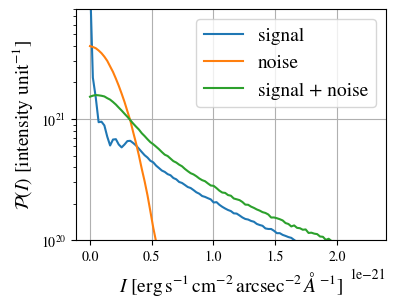

In [84]:
plt.figure(figsize=(4,3))
plt.plot(log_I_bins[:-1], vid, label='signal')
plt.plot(log_I_bins[:-1], vid_noise, label='noise')
plt.plot(log_I_bins[:-1], vid_added, label='signal + noise')

plt.yscale('log')
plt.xlabel(r'$I$ [{}]'.format(intensity_unit_str), fontsize=14)
plt.ylabel(r'$\mathcal{P}(I)$ [intensity unit$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.ylim(1e20, 8e21)